# Travel Insurance Prediction
---
[Data source](https://www.kaggle.com/tejashvi14/travel-insurance-prediction-data)

A Tour & Travels company is offering travel insurance package to their customers.
The new insurance package also includes covid cover.
The company requires to know the which customers would be interested to buy it based on its database history.

The insurance was offered to some of the customers in 2019 and the given data has been extracted from the performance/sales of the package during that period.
The data is provided for almost 2000 of its previous customers.

*Goal of this project* - building a classification model that can predict if the customer will be interested to buy the travel insurance package.

Data was previously cleaned in [Google sheets](https://docs.google.com/spreadsheets/d/1-pZdBVA_4dQfpvml7Upj4WPbqAWp1WXki2kXr4sXH94/edit?usp=sharing).
I used *if* statements to convert data into binary data type.

### Research Question
What is a portrait of an ideal customer for a travel insurance company?

This question I answered mainly in [Tableau](https://public.tableau.com/app/profile/fedotova.elena/viz/CustomerDemographicsAnalysis/Dashboard1) 

### Uploading libraries

In [1]:
# import libraries required
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import statsmodels.api as sm

#import data
from sklearn.tree import export_graphviz

# import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# import evaluation functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score

# matplotlib for plotting modification
import matplotlib.pyplot as plt
%matplotlib inline

# scikitplot to directly plot our results
import graphviz
import scikitplot as skplt
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import category_scatter

### Uploading data

In [2]:
df = pd.read_csv("./Travel_insurance_data.csv")

In [3]:
df.head()

,Age,Government Sector,Private Sector/Self Employed,High_Education,Annual_Income,Family_Members,Chronic_Diseases,Frequent_Flyer,Travelled_Abroad,Travel_Insurance
0,31,1,0,1,400000,6,1,0,0,0
1,31,0,1,1,1250000,7,0,0,0,0
2,34,0,1,1,500000,4,1,0,0,1
3,28,0,1,1,700000,3,1,0,0,0
4,28,0,1,1,700000,8,1,1,0,0


### Columns Description
- Age - Age Of The Customer
- Government Sector - The Customer Is Employed in Government Sector
- Private Sector/Self Employed - The Customer Is Employed in Private Sector
- High_Education - Whether The Customer Is a College Graduate Or Not
- Annual_Income - The Yearly Income Of The Customer In Indian Rupees [Rounded To Nearest 50 Thousand Rupees]
- Family_Members - Number Of Members In Customer's Family
- Chronic_Disease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
- Frequent_Flyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].
- Travelled_Abroad - Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]
- Travel_Insurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

In [4]:
df.describe()

,Age,Government Sector,Private Sector/Self Employed,High_Education,Annual_Income,Family_Members,Chronic_Diseases,Frequent_Flyer,Travelled_Abroad,Travel_Insurance
count,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,0.286865,0.713135,0.851535,9.327630e+05,4.752894,0.277806,0.209864,0.191243,0.357323
std,2.913308,0.452412,0.452412,0.355650,3.768557e+05,1.609650,0.448030,0.407314,0.393379,0.479332
min,25.000000,0.000000,0.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,0.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,0.000000,1.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,1.000000,1.000000,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,35.000000,1.000000,1.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


# Checking the null values
df.isnull().sum(axis=0)

In [5]:
# Checking the data type
df.dtypes

Age                             int64
Government Sector               int64
Private Sector/Self Employed    int64
High_Education                  int64
Annual_Income                   int64
Family_Members                  int64
Chronic_Diseases                int64
Frequent_Flyer                  int64
Travelled_Abroad                int64
Travel_Insurance                int64
dtype: object

### Ethical Concerns

This data set respects confidentiality and privacy of customers. There is no access to customer's personal information like name or gender. Information about Chronic Diseases was coded into binary data, where 0 - "no", 1 - "yes". I have no concern regarding future use of this data set.

## EDA

### Exploring the Variables

Variables that influence Travel_insurance the most are
- Travelled Abroad (0.43)
- Annual Income (0.4)

Also, there is a correlation between this varaibles (0.49) but since it's not too strong it will not influence further analysis. 

Text(0.5, 1.0, 'Heatmap of The Variables')

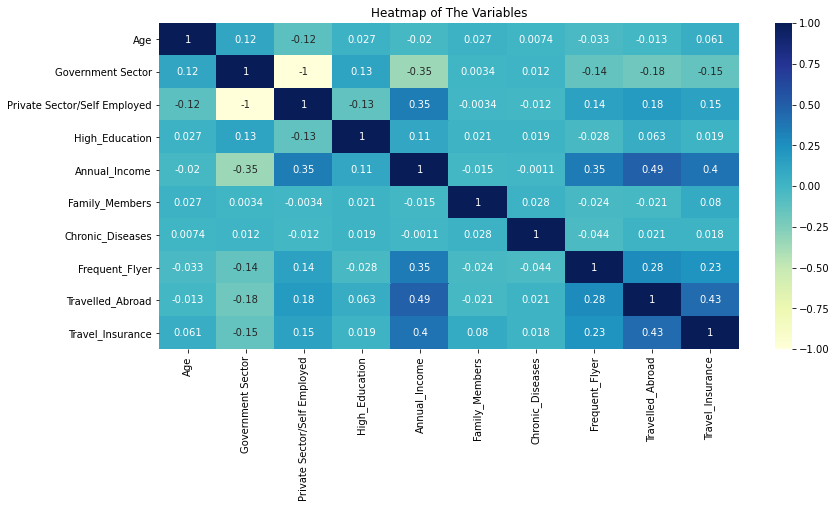

In [6]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.title("Heatmap of The Variables")

Now let's count percentage of travellers who bought insurance and how did not bought it.

In [7]:
count_no_insurance = len(df[df['Travel_Insurance']==0])
count_insurance = len(df[df['Travel_Insurance']==1])
pct_of_no_insurance = count_no_insurance/(count_no_insurance+count_insurance)
pct_of_insurance = count_insurance/(count_no_insurance+count_insurance)

print("percentage of no insurance is", pct_of_no_insurance*100)
print("percentage of insurance", pct_of_insurance*100)

percentage of no insurance is 64.26774031202818
percentage of insurance 35.73225968797182


### The ratio of no-insurance to insurance is 64:36. 
Visualisation below

Text(0.5, 1.0, 'Travel Insurance Ratio')

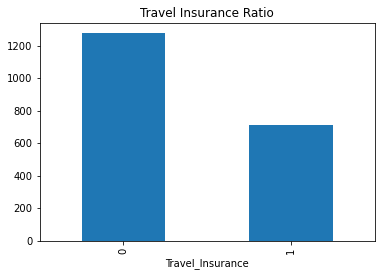

In [8]:
df.groupby('Travel_Insurance').size().plot(kind='bar')
plt.title("Travel Insurance Ratio")

Text(0.5, 1.0, 'Annual Income by Travel Insurance')

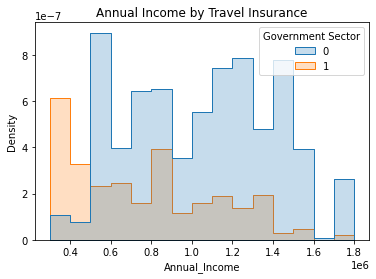

In [30]:
sns.histplot(df, x="Annual_Income", element="step",
    stat="density", hue="Government Sector")
plt.title("Annual Income by Travel Insurance")

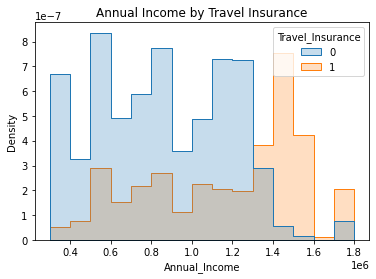

In [33]:
sns.histplot(df, x="Annual_Income", element="step",
    stat="density", hue="Travel_Insurance")
plt.title("Annual Income by Travel Insurance")
plt.savefig('output.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Annual Income by Travelled Abroad')

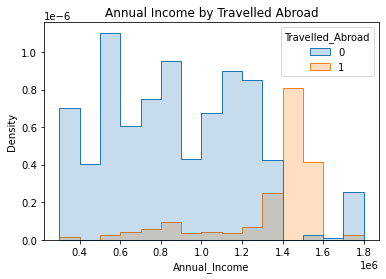

In [10]:
sns.histplot(df, x="Annual_Income", element="step",
    stat="density", hue="Travelled_Abroad")
plt.title("Annual Income by Travelled Abroad")
plt.savefig('output.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Annual Income by Flight Frequency')

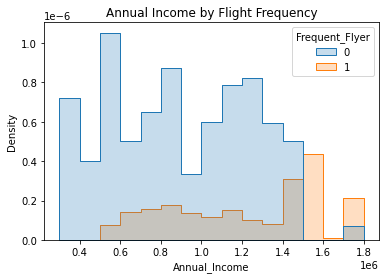

In [11]:
sns.histplot(df, x="Annual_Income", element="step",
    stat="density", hue="Frequent_Flyer")
plt.title("Annual Income by Flight Frequency")

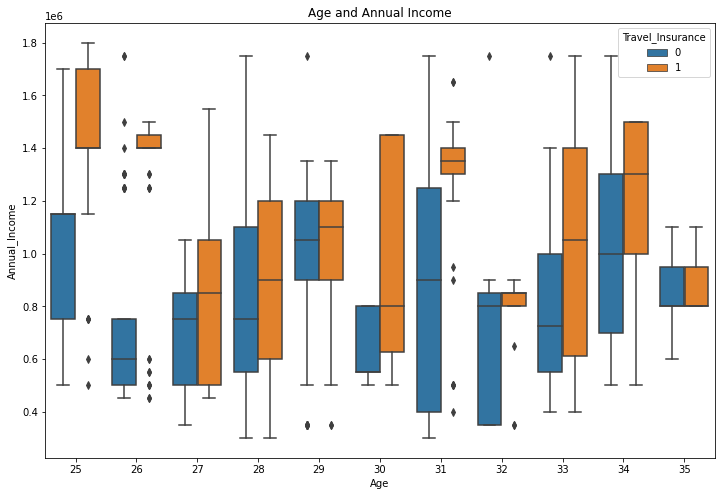

In [31]:
fig,ax=plt.subplots(figsize=(12,8))
sns.boxplot(x='Age',y='Annual_Income',hue='Travel_Insurance',data=df)
plt.title('Age and Annual Income')

Within each age group, the higher income of a customer the more likely they will buy an insurance.

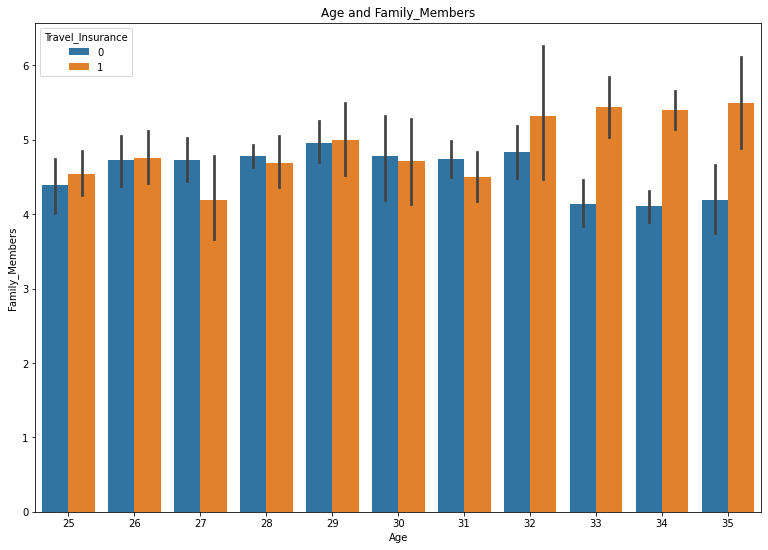

In [46]:
fig,ax=plt.subplots(figsize=(13,9))
sns.barplot(x='Age',y='Family_Members',hue='Travel_Insurance',data=df)
plt.title('Age and Family_Members')

Text(0.5, 1.0, 'Customers Travelled Abroad')

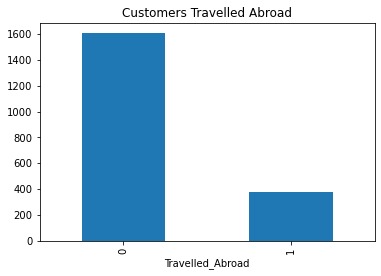

In [14]:
df.groupby('Travelled_Abroad').size().plot(kind='bar')
plt.title("Customers Travelled Abroad")

Text(0.5, 1.0, 'Customers Chronic Diseases')

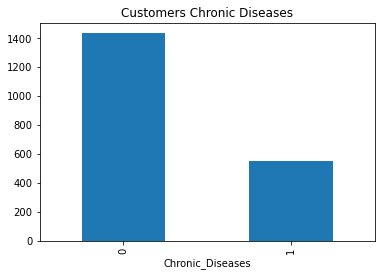

In [15]:
df.groupby('Chronic_Diseases').size().plot(kind='bar')
plt.title("Customers Chronic Diseases")

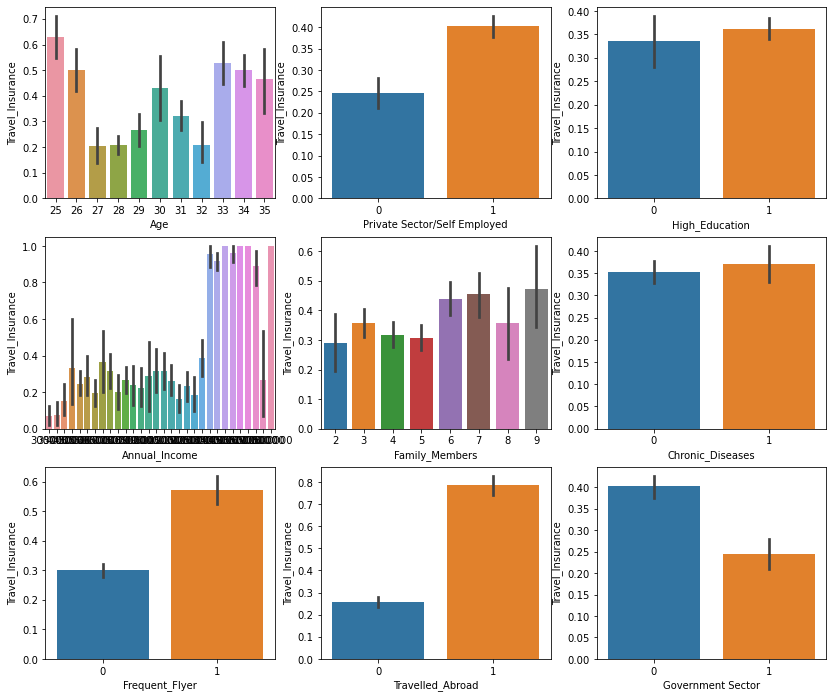

In [44]:
fig , ax = plt.subplots(nrows = 3, ncols = 3, figsize=(14,12))

sns.barplot(x="Age",y="Travel_Insurance",data=df,ax=ax[0][0])
sns.barplot(x="Private Sector/Self Employed",y="Travel_Insurance",data=df,ax=ax[0][1])
sns.barplot(x="High_Education",y="Travel_Insurance",data=df,ax=ax[0][2])
anual = sns.barplot(x="Annual_Income",y="Travel_Insurance",data=df,ax=ax[1][0])
sns.barplot(x="Family_Members",y="Travel_Insurance",data=df,ax=ax[1][1])
sns.barplot(x="Chronic_Diseases",y="Travel_Insurance",data=df,ax=ax[1][2])
sns.barplot(x="Frequent_Flyer",y="Travel_Insurance",data=df,ax=ax[2][0])
sns.barplot(x="Travelled_Abroad",y="Travel_Insurance",data=df,ax=ax[2][1])
sns.barplot(x="Government Sector",y="Travel_Insurance",data=df,ax=ax[2][2])

plt.savefig('output.png', dpi=300, bbox_inches='tight')

### Observations

- When people travelled abroad they are more likely to purchase insurance
- No matter the age group, customers with higher income are more likely to buy insurance
- Customers with high income travel abroad more
- Customers with the age range of 32 to 35 with bigger families are more likely to buy insurance. 

# Classification model

Since the dependent variable(Travel_Insurance) is categorical, the best model to use for it's prediction is a classification model. I will build
1. Logistic regression model
2. Random forest model

### Logistic regression model

In [17]:
# including all previous columns, only dropping the dependent variable 'WineType'
X = df.drop(labels='Travel_Insurance', axis=1)

# ensuring our y (prediction) is only included
y = df['Travel_Insurance']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1337)

In [19]:
# initializing our logistic regression model, we set the maximum iterations to 3000 so that the model can find a solution. The default may be sufficient in most cases (100)
lr = LogisticRegression(random_state=7007, max_iter=100) 
lr.fit(X_train, y_train)

# using our model to predict
y_pred = lr.predict(X_test)

# evaluation
print("Accuracy Score:",accuracy_score(y_test, y_pred))

Accuracy Score: 0.6683417085427136


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       399
           1       0.00      0.00      0.00       198

    accuracy                           0.67       597
   macro avg       0.33      0.50      0.40       597
weighted avg       0.45      0.67      0.54       597



C:\Users\lenaa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenaa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenaa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

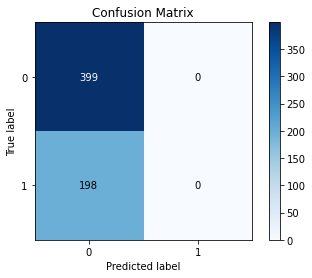

In [21]:
# Building a confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

Accuracy score for the first model is 66.83% which is not great. 
Let's try a next model. 

### Random forest

In [22]:
# initializing our random forest model
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

# using our model to predict
y_pred = rf.predict(X_test)

# accuracy score
accuracy_score(y_test, y_pred)

0.8157453936348409

Accuracy score for the first model is 78.89% which is better than the first model. 
Let's do hyperparameter tuning and check the difference in accuracy score.

### Hyperparameter tuning

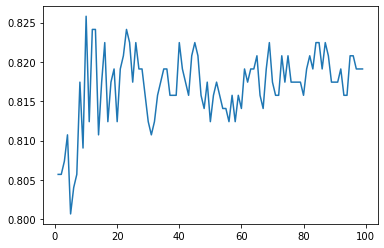

In [23]:
# the range of trees we want to test
numberoftrees = range(1, 100)
scores = []

# for loop
for n in numberoftrees:
    # in the n_estimators parameter, we're going to be testing all the values found in our range
    rf = RandomForestClassifier(n_estimators=n, random_state=1337)
    # fitting our model
    rf.fit(X_train, y_train)
    #prediction
    y_pred = rf.predict(X_test)
    # appending our result to variable scores
    scores.append(accuracy_score(y_test, y_pred))

# plotting our results
plt.plot(numberoftrees, scores)

In [24]:
# initializing our random forest model
rf = RandomForestClassifier(n_estimators=14, random_state=1337)
rf.fit(X_train, y_train)

# using our model to predict
y_pred = rf.predict(X_test)

# accuracy score
accuracy_score(y_test, y_pred)

0.8107202680067002

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       399
           1       0.75      0.65      0.70       198

    accuracy                           0.81       597
   macro avg       0.79      0.77      0.78       597
weighted avg       0.81      0.81      0.81       597



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

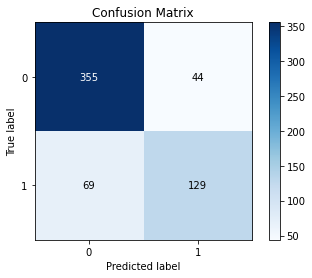

In [26]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

After Hyperparameter tuning accuracy score rased by 3% and now it is 81%, and that is a great score! 
Also, the model correctly guessed 0("No insurance") in 86% of all cases and guessed 1("Insurance") in 70% of all cases.

### Cross-validation

To test the ability of a machine learning model to predict new data and to ensure that every observation from the original dataset has the chance of appearing in training and test set I will do cross-validation.

In [47]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rf, X_train, y_train, cv=5))
print(np.mean(cross_val_score(rf, X_train, y_train, cv=5)))

[0.80747126 0.75862069 0.78674352 0.76368876]
0.7791310576700122


In [49]:
score = cross_val_score(rf, X_train, y_train, cv=5)
print(f'Mean accuracy on folds: {np.mean(score)}')

Mean accuracy on folds: 0.7791310576700122


### Feature importance

By analyzing the feature importance I was be able to identify that the feature Annual_Income is the strongest predictor of my model, while the weakest is Employment(Government Sector, Private Sector/Self Employed). 

<AxesSubplot:title={'center':'Feature Importance'}>

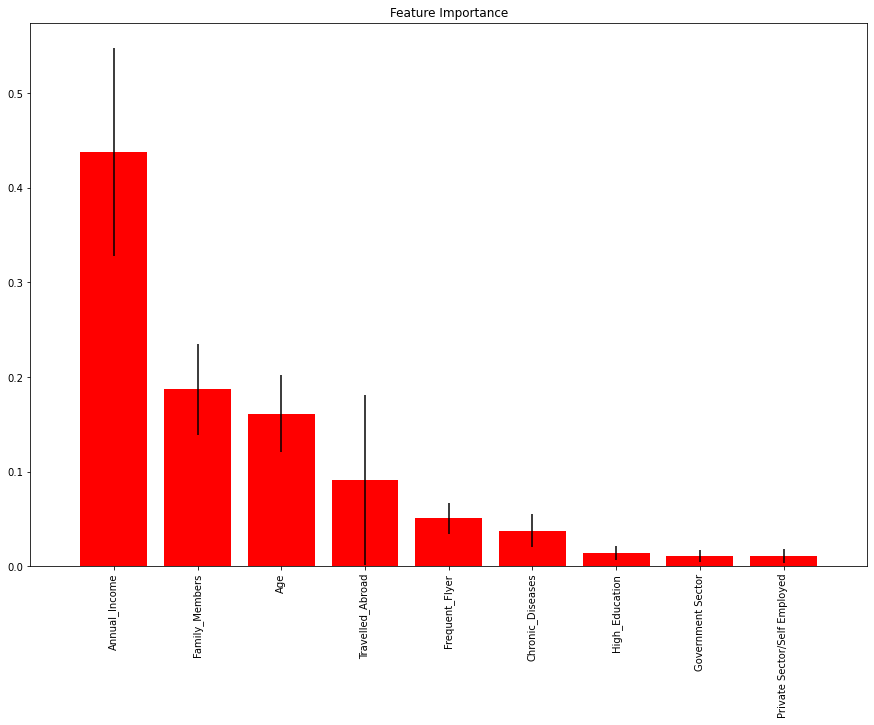

In [29]:
# assigning column names to variable 'feature_names'
feature_names = X.columns

skplt.estimators.plot_feature_importances(rf, feature_names=feature_names, figsize=(15, 10), x_tick_rotation=90)

### Recommendations

Prediction model Random forest is ready for use on a whole customer's data set.

Review this demographic analysis, since this data sample is limited. The customer's age is in range of 25-35 years.

Rise an awareness regarding risks associated with traveling and convince first-time flyers and travellers of the need of insurance. That might increase the sales of the new insurance package.

Create a more inclusive medical scope in the new insurance package to include more chronic diseases. The data shows a high count of customers with chronic diseases who have never bought a travel insurance.